#### Static with no schocks

In [1]:
import sys
import sys
sys.path.append('../Code/pyESN-master/')
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
%matplotlib inline

data = np.load('../../Data/Synthetic/Mackey_Glass/Static/mackey_glass_simple_no_noise.npy')



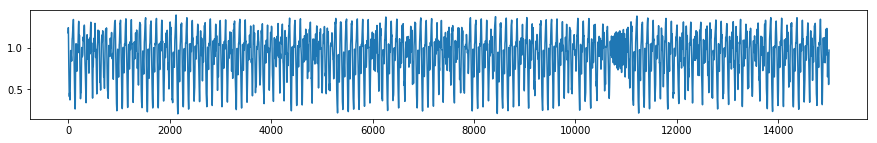

In [2]:
plt.figure(figsize=(15,2))
plt.plot(data)

test error: 
0.36774398097808036
test std: 
0.949044836635371


(13900, 14500)

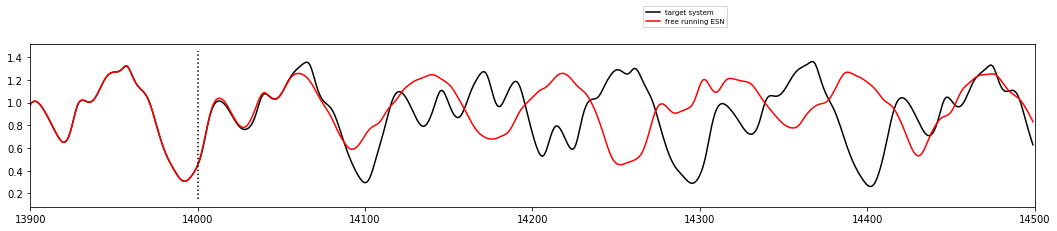

In [38]:
esn = ESN(n_inputs = 1,
          n_outputs = 1,
          n_reservoir = 500,
          spectral_radius = 1.3,
          random_state=42)

trainlen = 14000
future = 500
pred_training = esn.fit(np.ones(trainlen),data[:trainlen])

prediction = esn.predict(np.ones(future))
print("test error: \n"+str(np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))))
print("test std: \n"+str(np.sqrt(np.mean((data[trainlen:trainlen+future])**2))))


skip_from_train = 13900
plt.figure(figsize=(18,3))
plt.plot(range(skip_from_train,trainlen+future),data[skip_from_train:trainlen+future],'k',label="target system")
plt.plot(range(0,trainlen+future),np.concatenate([pred_training,prediction]),'r', label="free running ESN")

prediction_benchmark = data[trainlen-1:trainlen+future-1]
lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
plt.legend(loc=(0.61,1.1),fontsize='x-small')
plt.xlim(skip_from_train, trainlen+future)

### Static with noise

In [79]:
data = np.load('../../Data/Synthetic/Mackey_Glass/Static/mackey_glass_simple_with_random_shocks_1.npy')

test error: 
0.21872469240067763
test std: 
0.9603308737936359


(14000, 15000)

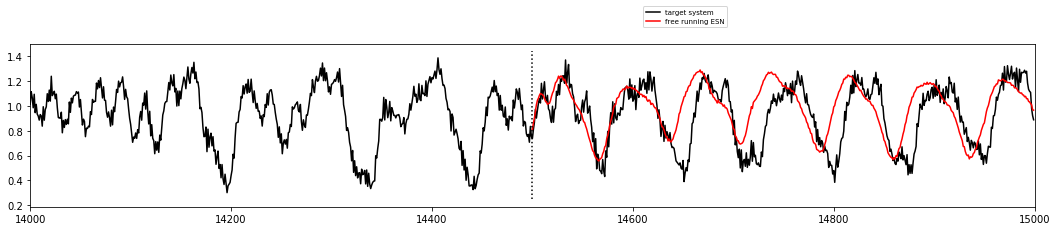

In [83]:
esn = ESN(n_inputs = 1,
          n_outputs = 1,
          n_reservoir = 500,
          spectral_radius = 1.3,
          random_state=42)

trainlen = 14500
future = 500
pred_training = esn.fit(np.ones(trainlen),data[:trainlen])

prediction = esn.predict(np.ones(future))
print("test error: \n"+str(np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))))
print("test std: \n"+str(np.sqrt(np.mean((data[trainlen:trainlen+future])**2))))


skip_from_train = 14000
plt.figure(figsize=(18,3))
plt.plot(range(skip_from_train,trainlen+future),data[skip_from_train:trainlen+future],'k',label="target system")
plt.plot(range(trainlen,trainlen+future),prediction,'r', label="free running ESN")

prediction_benchmark = data[trainlen-1:trainlen+future-1]
lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
plt.legend(loc=(0.61,1.1),fontsize='x-small')
plt.xlim(skip_from_train, trainlen+future)

In [63]:
trainlen = 14500
future = 500

errors = {}

for res_size in range(495, 505, 1):
    esn = ESN(n_inputs = 1,
          n_outputs = 1,
          n_reservoir = res_size,
          spectral_radius = 1.3,
          random_state=42)

    pred_training = esn.fit(np.ones(trainlen),data[:trainlen])

    prediction = esn.predict(np.ones(future))
    error=np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))
    errors[res_size] = error
    
    print("test error with res. size"+str(res_size)+": \n"+str(error))

test error with res. size495: 
2.92579627811231
test error with res. size496: 
0.8724377848179242
test error with res. size497: 
0.2868792918885746
test error with res. size498: 
0.40921771458409906


KeyboardInterrupt: 

In [46]:

trainlen = 14500
future = 500

errors = {}

for res_size in range(450, 550, 5):
    esn = ESN(n_inputs = 1,
          n_outputs = 1,
          n_reservoir = res_size,
          spectral_radius = 1.3,
          random_state=42)

    pred_training = esn.fit(np.ones(trainlen),data[:trainlen])

    prediction = esn.predict(np.ones(future))
    error=np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))
    errors[res_size] = error
    
    print("test error with res. size"+str(res_size)+": \n"+str(error))

test error with res. size510: 
0.27800907921709306


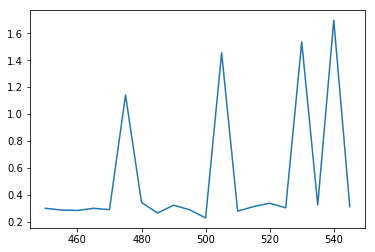

In [47]:
plt.plot(errors.keys(),errors.values())